In [1]:
import HH

In [2]:
reload("HH")

In [3]:
using Base.Test

In [4]:
@test_approx_eq_eps(HH.ηzpe(11, 0.02), 0.9368071126414523, 1e-5)

In [5]:
using PyPlot

In [6]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [7]:
q = 7;
gs = Array(Float64, 200,200);
HH.hhgrstate!(gs, q);

In [8]:
a, b = extrema(gs)

(-3.2033030254750585,-3.197578907340933)

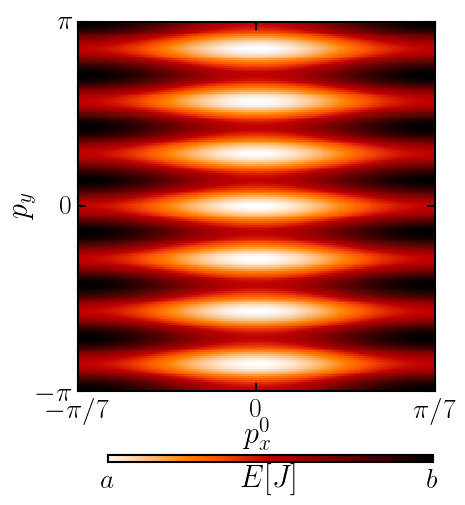

In [9]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](gs, origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-π/q, π/q, -π, π],
                 aspect="auto")

ax[:set_ylabel](L"$p_y$",labelpad=-1)
ax[:set_xlabel](L"$p_x^0$", labelpad=-1)
ax[:xaxis][:set_ticks]([-π/q,0,π/q])
ax[:xaxis][:set_ticklabels]([LaTeXString(string("\$-\\pi/",q,"\$")), L"$0$", LaTeXString(string("\$\\pi/",q,"\$"))])

ax[:yaxis][:set_ticks]([-π,0,π])
ax[:yaxis][:set_ticklabels]([L"$-\pi$", L"$0$", L"$\pi$"])

cbaxes = f[:add_axes]([0.25, 0.04, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([a,b])
cbar[:set_ticklabels]([L"$a$", L"$b$"])
cbar[:set_label](L"$E[J]$", rotation=0, labelpad=-20, y=0.5)
cbar[:solids][:set_edgecolor]("face")
#f[:savefig]("pan2D.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

In [10]:
ladder = Array(Float64, (200,q))
HH.hhladder!(ladder)

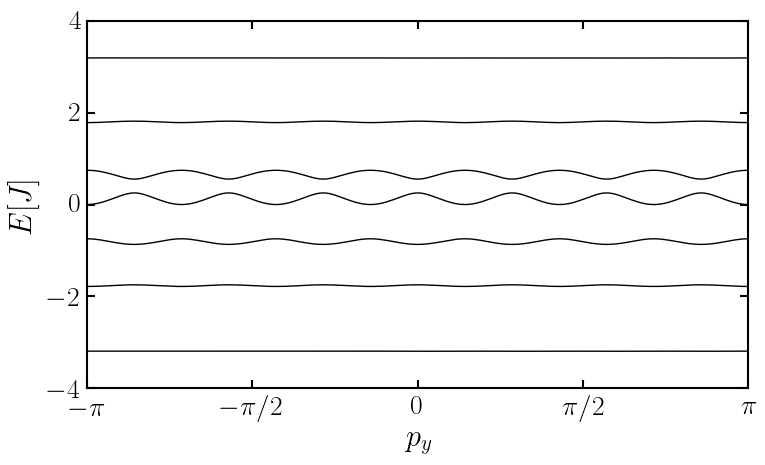

In [11]:
f, ax = plt.subplots(figsize=(8, 5))

for i in 1:q
    ax[:plot](linspace(-π,π,size(ladder,1)), ladder[:,i], "k")
end

ax[:yaxis][:set_ticks]([-4,-2,0,2,4])
ax[:xaxis][:set_ticks]([-π,-π/2,0,π/2,π])
ax[:xaxis][:set_ticklabels]([L"$-\pi$",L"$-\pi/2$", L"$0$",L"$\pi/2$" ,L"$\pi$"])

ax[:set_xlim](-π, π)

ax[:set_ylabel](L"$E[J]$")
ax[:set_xlabel](L"$p_y$")
nothing

In [12]:
qs = 3:20;

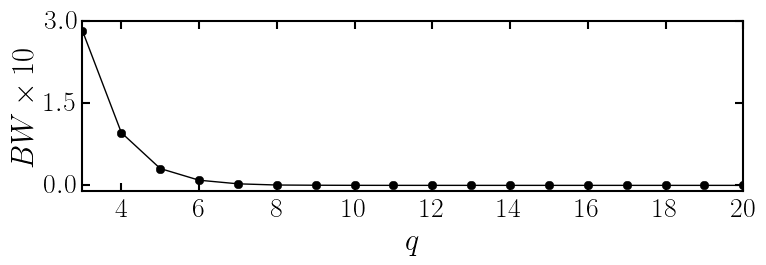

In [13]:
f, ax = plt.subplots(figsize=(8, 3))
ax[:plot](qs, HH.bwidth(qs).*10, "black", marker="o") 

ax[:set_ylim](-0.1, 3)
ax[:yaxis][:set_ticks]([0,1.5,3])
ax[:set_xlim](qs[1], qs[end])

ax[:set_xlabel](L"$q$")
ax[:set_ylabel](L"$BW \times 10$")
nothing

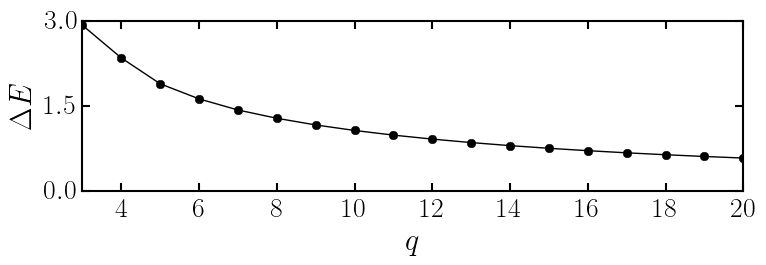

In [14]:
f, ax = plt.subplots(figsize=(8, 3))
ax[:plot](qs, HH.bgap(qs), "black", marker="o") 

ax[:set_ylim](0, 3)
ax[:yaxis][:set_ticks]([0,1.5,3])
ax[:set_xlim](qs[1], qs[end])

ax[:set_xlabel](L"$q$")
ax[:set_ylabel](L"$\Delta E$")
nothing

In [ ]:
#TODO: combine into a single plot and save

In [ ]:
#TODO: add plot for small κ limit (see psign.png)

In [15]:
κs = linspace(0.02, 0.3, 100);
qs = 5:15;

In [16]:
@time η2Dzpe = HH.ηzpe(qs, κs);

elapsed time: 10.688671436 seconds (1337960624 bytes allocated, 12.38% gc time)


In [17]:
@time η2Dlev = HH.ηlev(qs, κs);

elapsed time: 15.074989868 seconds (1555302404 bytes allocated, 11.10% gc time)


In [18]:
toterr = abs(η2Dzpe) + abs(η2Dlev);

In [19]:
extrema(toterr)

(0.6275721792550637,2.7772797566626237)

In [20]:
i,j = ind2sub(size(toterr), indmin(toterr));

In [21]:
qs[i]

15

In [22]:
κs[j]

0.3

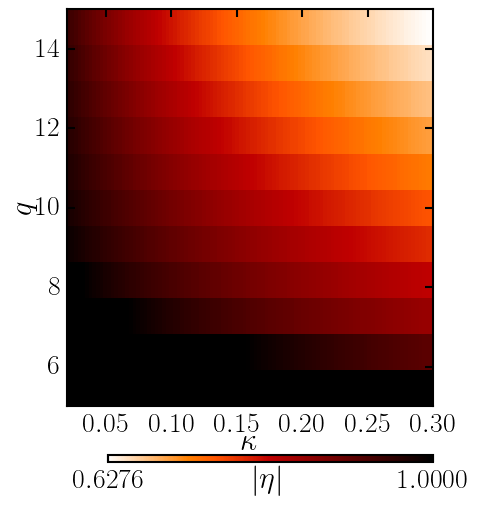

In [23]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](toterr, origin="lower", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[κs[1], κs[end], qs[1], qs[end]],
                 vmin=minimum(toterr), vmax=1,
                 aspect="auto")

ax[:set_ylabel](L"$q$",labelpad=-1)
ax[:set_xlabel](L"$\kappa$", labelpad=-6)
#ax[:xaxis][:set_ticks]([.02,1,2,3])
#ax[:xaxis][:set_ticklabels]([L"$.02$", L"$1$", L"$2$", L"$3$"])
cbaxes = f[:add_axes]([0.25, 0.04, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([minimum(toterr), 1])
#cbar[:set_ticklabels]([L"$-.8$", L"$0$"])
cbar[:set_label](L"$|\eta|$", rotation=0, labelpad=-20, y=0.5)
cbar[:solids][:set_edgecolor]("face")
#f[:savefig]("pan2D.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

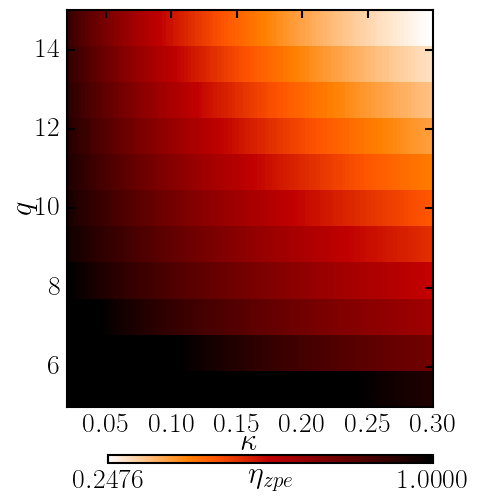

In [24]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](η2Dzpe, origin="lower", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[κs[1], κs[end], qs[1], qs[end]],
                 vmin=minimum(η2Dzpe), vmax=1,
                 aspect="auto")

ax[:set_ylabel](L"$q$",labelpad=-1)
ax[:set_xlabel](L"$\kappa$", labelpad=-6)
#ax[:xaxis][:set_ticks]([.02,1,2,3])
#ax[:xaxis][:set_ticklabels]([L"$.02$", L"$1$", L"$2$", L"$3$"])
    
cbaxes = f[:add_axes]([0.25, 0.04, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([minimum(η2Dzpe), 1])
#cbar[:set_ticklabels]([L"$-.6$", L"$0$" ,L"$1$"])
cbar[:set_label](L"$\eta_{\text{zpe}}$", rotation=0, labelpad=-20, y=0.5)
cbar[:solids][:set_edgecolor]("face")
#f[:savefig]("pan2D.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

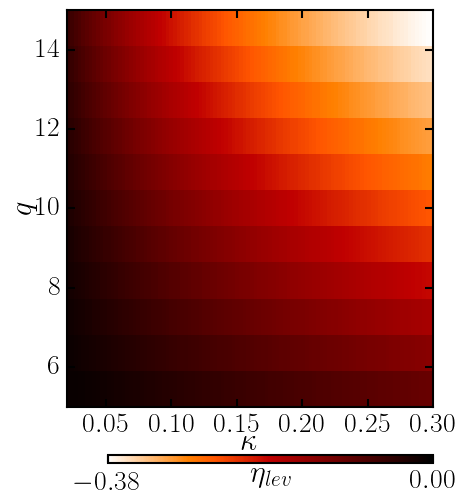

In [25]:
f, ax = plt.subplots(figsize=(5, 5))
im = ax[:imshow](η2Dlev, origin="lower", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[κs[1], κs[end], qs[1], qs[end]],
                 vmin=minimum(η2Dlev), vmax=0,
                 aspect="auto")

ax[:set_ylabel](L"$q$",labelpad=-1)
ax[:set_xlabel](L"$\kappa$", labelpad=-6)
#ax[:xaxis][:set_ticks]([.02,1,2,3])
#ax[:xaxis][:set_ticklabels]([L"$.02$", L"$1$", L"$2$", L"$3$"])
    
cbaxes = f[:add_axes]([0.25, 0.04, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([minimum(η2Dlev), 0])
#cbar[:set_ticklabels]([L"$-.8$", L"$0$"])
cbar[:set_label](L"$\eta_{\text{lev}}$", rotation=0, labelpad=-20, y=0.5)
cbar[:solids][:set_edgecolor]("face")
#f[:savefig]("pan2D.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

In [26]:
κs = linspace(.02,3., 100);
qs = 4:20;

In [27]:
η5 = HH.ηzpe(5, κs);
η11 = HH.ηzpe(11, κs);
η20 = HH.ηzpe(20, κs);

In [28]:
η002 = HH.ηzpe(qs, 0.02);
η03 = HH.ηzpe(qs, 0.3);
η30 = HH.ηzpe(qs, 3.0);

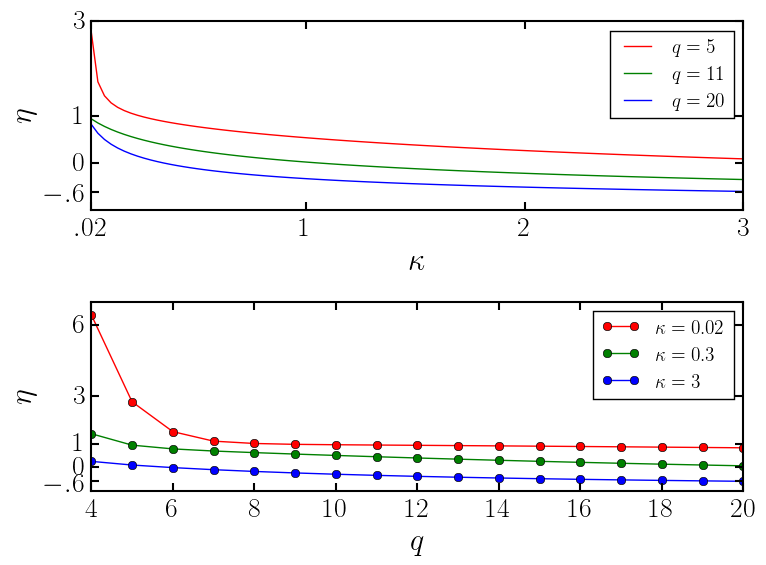

In [29]:
f, axes = plt.subplots(2, figsize=(8, 6))
for (i,ax) in enumerate(axes)
    if i == 1
        ax[:plot](κs, η5, "red", label=L"$q=5$") 
        ax[:plot](κs, η11,"green", label=L"$q=11$") 
        ax[:plot](κs, η20,"blue", label=L"$q=20$") 
        
        ax[:set_yticks]([-0.6, 0, 1, 3])
        ax[:set_yticklabels]([L"$-.6$", L"$0$" ,L"$1$", L"$3$"])
        
        ax[:legend](loc="upper right")
        
        ax[:xaxis][:set_ticks]([.02,1,2,3])
        ax[:xaxis][:set_ticklabels]([L"$.02$", L"$1$", L"$2$", L"$3$"])
        ax[:set_xlim](κs[1], κs[end])
        ax[:set_xlabel](L"$\kappa$")
        ax[:set_ylabel](L"$\eta$")
    else
        ax[:plot](qs, η002, "red", marker="o", label=L"$\kappa=0.02$") 
        ax[:plot](qs, η03, "green",marker="o", label=L"$\kappa=0.3$") 
        ax[:plot](qs, η30, "blue",marker="o", label=L"$\kappa=3$") 
        ax[:legend](loc="upper right")

        ax[:set_yticks]([-0.6, 0, 1, 3, 6])
        ax[:set_yticklabels]([L"$-.6$", L"$0$" ,L"$1$", L"$3$", L"$6$"])

        ax[:set_xlim](qs[1], qs[end])

        ax[:set_xlabel](L"$q$")
        ax[:set_ylabel](L"$\eta$")
    end
end
f[:savefig]("pan.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")
plt.close(f)

In [30]:
HH.ηzpe(7, 0.2)

0.7759030500775894

In [31]:
HH.ηlev(7, 0.2)

-0.12259661052674486

In [32]:
ηκ = HH.ηzpe(7, linspace(1e-3,0.2, 100));

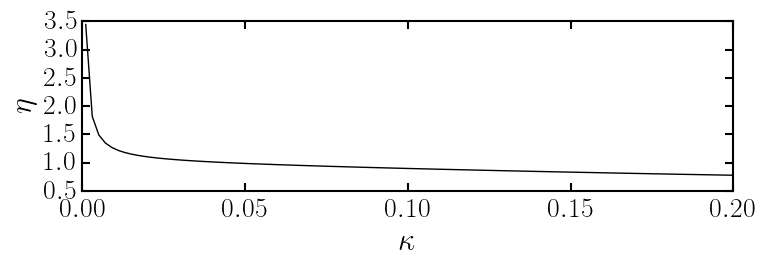

In [33]:
f, ax = plt.subplots(figsize=(8, 3))
ax[:plot](linspace(1e-3,0.2, 100), ηκ, "k") 

ax[:set_xlabel](L"$\kappa$")
ax[:set_ylabel](L"$\eta$")
nothing

In [34]:
ηq = HH.ηzpe(7:80, 0.02);

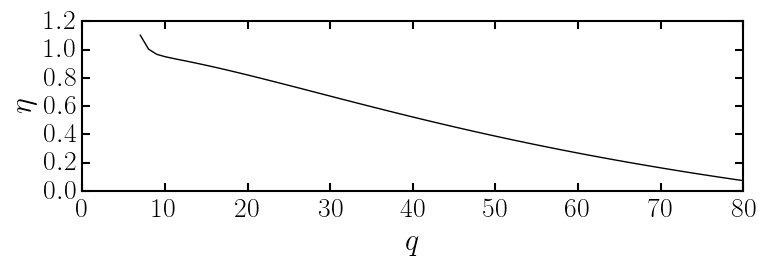

In [35]:
f, ax = plt.subplots(figsize=(8, 3))
ax[:plot](7:80, ηq, "k") 

ax[:set_xlabel](L"$q$")
ax[:set_ylabel](L"$\eta$")
nothing